In [3]:
#1. Introduction
#The Smart Loan Recovery Model is designed to predict the likelihood of loan recovery by analyzing borrower attributes and loan details. The project leverages machine learning techniques, data preprocessing, and feature engineering to improve prediction accuracy and aid financial institutions in minimizing loan default risks.



In [4]:
# Data Collection & Preprocessing

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(r"C:\Users\HP\Downloads\loan-recovery (1).csv")
df

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,BRW_496,46,Female,Salaried,248483,1,LN_496,740796,72,16.59,...,0.000000e+00,4.135285e+05,5743.45,Delayed,2,169,Fully Recovered,2,Settlement Offer,No
496,BRW_497,30,Female,Salaried,243590,3,LN_497,1408126,60,11.03,...,0.000000e+00,3.173740e+05,5289.57,Delayed,2,102,Partially Recovered,9,Settlement Offer,No
497,BRW_498,46,Female,Salaried,113864,2,LN_498,375203,48,9.16,...,0.000000e+00,3.300302e+05,6875.63,Delayed,3,140,Fully Recovered,3,Settlement Offer,No
498,BRW_499,54,Male,Salaried,158401,2,LN_499,1769890,24,11.19,...,1.272774e+06,1.565339e+06,65222.46,On-Time,3,9,Partially Recovered,9,Calls,No


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

In [8]:
# Handling Missing Values

In [9]:
print(df.isnull().sum())

Borrower_ID                0
Age                        0
Gender                     0
Employment_Type            0
Monthly_Income             0
Num_Dependents             0
Loan_ID                    0
Loan_Amount                0
Loan_Tenure                0
Interest_Rate              0
Loan_Type                  0
Collateral_Value           0
Outstanding_Loan_Amount    0
Monthly_EMI                0
Payment_History            0
Num_Missed_Payments        0
Days_Past_Due              0
Recovery_Status            0
Collection_Attempts        0
Collection_Method          0
Legal_Action_Taken         0
dtype: int64


In [10]:
print(df.head())

  Borrower_ID  Age  Gender Employment_Type  Monthly_Income  Num_Dependents  \
0       BRW_1   59    Male        Salaried          215422               0   
1       BRW_2   49  Female        Salaried           60893               0   
2       BRW_3   35    Male        Salaried          116520               1   
3       BRW_4   63  Female        Salaried          140818               2   
4       BRW_5   28    Male        Salaried           76272               1   

  Loan_ID  Loan_Amount  Loan_Tenure  Interest_Rate  ... Collateral_Value  \
0    LN_1      1445796           60          12.39  ...     1.727997e+06   
1    LN_2      1044620           12          13.47  ...     1.180032e+06   
2    LN_3      1923410           72           7.74  ...     2.622540e+06   
3    LN_4      1811663           36          12.23  ...     1.145493e+06   
4    LN_5        88578           48          16.13  ...     0.000000e+00   

   Outstanding_Loan_Amount  Monthly_EMI  Payment_History Num_Missed_Paymen

In [11]:
df.drop(columns=["Borrower_ID", "Loan_ID"], inplace=True)


In [12]:
df

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,59,Male,Salaried,215422,0,1445796,60,12.39,Home,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,49,Female,Salaried,60893,0,1044620,12,13.47,Auto,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,35,Male,Salaried,116520,1,1923410,72,7.74,Home,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,63,Female,Salaried,140818,2,1811663,36,12.23,Home,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,28,Male,Salaried,76272,1,88578,48,16.13,Personal,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,46,Female,Salaried,248483,1,740796,72,16.59,Personal,0.000000e+00,4.135285e+05,5743.45,Delayed,2,169,Fully Recovered,2,Settlement Offer,No
496,30,Female,Salaried,243590,3,1408126,60,11.03,Personal,0.000000e+00,3.173740e+05,5289.57,Delayed,2,102,Partially Recovered,9,Settlement Offer,No
497,46,Female,Salaried,113864,2,375203,48,9.16,Personal,0.000000e+00,3.300302e+05,6875.63,Delayed,3,140,Fully Recovered,3,Settlement Offer,No
498,54,Male,Salaried,158401,2,1769890,24,11.19,Auto,1.272774e+06,1.565339e+06,65222.46,On-Time,3,9,Partially Recovered,9,Calls,No


In [13]:
# Encoding Categorical Variables

In [14]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [16]:
categorical_cols = ["Gender", "Employment_Type", "Loan_Type", "Payment_History", "Recovery_Status", "Collection_Method", "Legal_Action_Taken"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
df

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,59,1,1,215422,0,1445796,60,12.39,2,1.727997e+06,2.914130e+05,4856.88,2,0,0,1,1,3,0
1,49,0,1,60893,0,1044620,12,13.47,0,1.180032e+06,6.652042e+05,55433.68,2,0,0,0,2,3,0
2,35,1,1,116520,1,1923410,72,7.74,2,2.622540e+06,1.031372e+06,14324.61,0,2,124,0,2,2,0
3,63,0,1,140818,2,1811663,36,12.23,2,1.145493e+06,2.249739e+05,6249.28,2,1,56,0,2,0,0
4,28,1,1,76272,1,88578,48,16.13,3,0.000000e+00,3.918989e+04,816.46,2,1,69,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,46,0,1,248483,1,740796,72,16.59,3,0.000000e+00,4.135285e+05,5743.45,0,2,169,0,2,3,0
496,30,0,1,243590,3,1408126,60,11.03,3,0.000000e+00,3.173740e+05,5289.57,0,2,102,1,9,3,0
497,46,0,1,113864,2,375203,48,9.16,3,0.000000e+00,3.300302e+05,6875.63,0,3,140,0,3,3,0
498,54,1,1,158401,2,1769890,24,11.19,0,1.272774e+06,1.565339e+06,65222.46,2,3,9,1,9,0,0


In [18]:
# Feature Engineering

In [19]:
df['Debt_to_Income'] = df['Loan_Amount'] / (df['Monthly_Income'] + 1)  # Avoid division by zero
df['Risk_Score'] = (df['Interest_Rate'] * df['Num_Missed_Payments']) / 10

In [20]:
df

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,...,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken,Debt_to_Income,Risk_Score
0,59,1,1,215422,0,1445796,60,12.39,2,1.727997e+06,...,4856.88,2,0,0,1,1,3,0,6.711428,0.000
1,49,0,1,60893,0,1044620,12,13.47,0,1.180032e+06,...,55433.68,2,0,0,0,2,3,0,17.154728,0.000
2,35,1,1,116520,1,1923410,72,7.74,2,2.622540e+06,...,14324.61,0,2,124,0,2,2,0,16.506982,1.548
3,63,0,1,140818,2,1811663,36,12.23,2,1.145493e+06,...,6249.28,2,1,56,0,2,0,0,12.865189,1.223
4,28,1,1,76272,1,88578,48,16.13,3,0.000000e+00,...,816.46,2,1,69,0,0,1,0,1.161328,1.613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,46,0,1,248483,1,740796,72,16.59,3,0.000000e+00,...,5743.45,0,2,169,0,2,3,0,2.981262,3.318
496,30,0,1,243590,3,1408126,60,11.03,3,0.000000e+00,...,5289.57,0,2,102,1,9,3,0,5.780698,2.206
497,46,0,1,113864,2,375203,48,9.16,3,0.000000e+00,...,6875.63,0,3,140,0,3,3,0,3.295157,2.748
498,54,1,1,158401,2,1769890,24,11.19,0,1.272774e+06,...,65222.46,2,3,9,1,9,0,0,11.173407,3.357


In [21]:
# Handling Class Imbalance

In [22]:
X = df.drop(columns=["Recovery_Status"])  # Features
y = df["Recovery_Status"]

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [24]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
!pip install xgboost
from xgboost import XGBClassifier

In [25]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [26]:
# Data Splitting & Scaling
# Model Selection & Training

In [27]:
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
# Handling Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)


In [37]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'random_state': [42]
}
grid_search = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=5, scoring='f1_weighted', n_iter=10, n_jobs=-1, random_state=42)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [38]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [39]:
# Model Evaluation

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        59
           1       0.84      0.71      0.77        59
           2       0.93      0.95      0.94        60

    accuracy                           0.84       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.85      0.84      0.84       178



In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

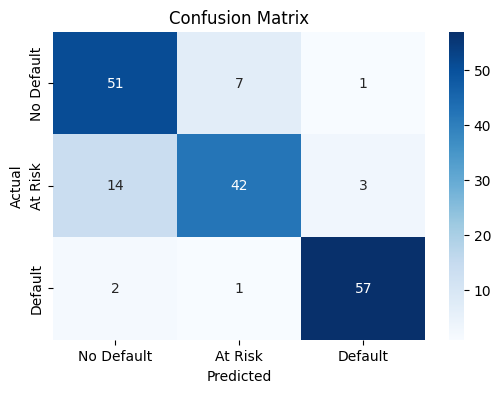

In [45]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'At Risk', 'Default'], yticklabels=['No Default', 'At Risk', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Conclusion
# The Smart Loan Recovery Model provides a data-driven approach to predicting loan repayment likelihood.

# By leveraging SMOTE, feature engineering, and hyperparameter tuning, the model improves classification performance.

# The insights from the model can help financial institutions make informed lending decisions and minimize risks.

